<a href="https://colab.research.google.com/github/kevin-weitgenant/Discrete-convolution/blob/main/trabalho_sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
try:
  X = np.genfromtxt('x.csv', delimiter=',',dtype = int)
  H = np.genfromtxt('h.csv', delimiter=',',dtype = int)
  X_idx,X_values = X[0::2],X[1::2]
  H_idx,H_values = H[0::2],H[1::2]
except:
  print("arquivos csv não informados, será utilizada função padrão definida no relatório")
  X_idx = np.array([0, 1, 2, 3, 4])
  X_values = np.array([1, 1, 1, 1, 1])
  H_idx = np.array([0, 1, 2, 3, 4, 5, 6])
  H_values = np.array([1,  2,  4,  8, 16, 32, 64])



X_idx,X_values,H_idx,H_values

arquivos csv não informados, será utilizada função padrão definida no relatório


(array([0, 1, 2, 3, 4]),
 array([1, 1, 1, 1, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([ 1,  2,  4,  8, 16, 32, 64]))

# discrete convolution

In [ ]:
def multiplyGraphsAndSum(X_idx,X_values,H_idx,H_values):
  result = 0
  positions = np.intersect1d(X_idx,H_idx)
  result =  np.sum([X_values[np.where(X_idx == item)] * H_values[np.where(H_idx == item)] for item in positions ])
  return result

def convolution(X_idx,X_values,H_idx,H_values):
  H_idx *= -1
  Y_values = []
  count = 0
  
  start_shift = min(X_idx) - max(H_idx)   #calcular o quanto arrastar pra primeira intersecção de apenas 1 valor:
  H_idx = H_idx + start_shift
  while(min(H_idx) != max(X_idx)+1):
    Y_values.append(multiplyGraphsAndSum(X_idx,X_values,H_idx,H_values))  
    H_idx +=1
    count+=1
  Y_idx = np.arange(start_shift,start_shift+count)

  return Y_idx,Y_values


# create graph:

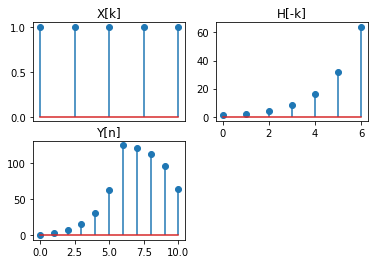

In [ ]:
plt.subplot(2, 2, 1)
plt.xticks([])
plt.title("X[k]")  
plt.stem(X_idx,X_values,use_line_collection= True)
plt.subplot(2, 2, 2)
plt.title("H[-k]")  
plt.stem(H_idx,H_values,use_line_collection= True)
plt.subplot(2, 2, 3)
plt.title("Y[n]")  
x,y=convolution(X_idx,X_values,H_idx,H_values)
plt.stem(x,y,use_line_collection = True)
plt.plot(use_line_collection= True)
plt.rcParams["figure.figsize"] = (50,50)
plt.savefig('my_plot.png')


